### **Advanced Statistics - Lab 8** 
Turgunboev Dadakhon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

### **Step 1: Generate random vectors from a multivariate normal distribution**

In [2]:
# Step 1: Generate random vectors from a multivariate normal distribution
def generate_data(d, N, sigma=1.0):
    """Generates N random vectors of dimension d from N(0, Σ)"""
    Sigma = np.diag(np.linspace(1, sigma, d))  # Example covariance matrix
    X = np.random.multivariate_normal(mean=np.zeros(d), cov=Sigma, size=N)
    return X, Sigma

### **Step 2: Estimate covariance matrix**

In [3]:
# Step 2: Estimate covariance matrix
def estimate_covariance(X):
    """Computes the sample covariance matrix Σ_N"""
    N = X.shape[0]
    return (1/N) * X.T @ X

### **Step 3: Compute the operator norm difference**

In [4]:
# Step 3: Compute the operator norm difference
def operator_norm_diff(Sigma, Sigma_hat):
    """Computes the operator norm ||Σ_N - Σ||"""
    return np.linalg.norm(Sigma_hat - Sigma, ord=2)  # Spectral norm (largest singular value)

### **Step 4: Compute projection norm bound**

In [5]:
# Step 4: Compute projection norm bound
def projection_norm_bound(Sigma, Sigma_hat, k):
    """Computes ||PΣ_N − PΣ||op bound"""
    eigvals_Sigma_hat, eigvecs_Sigma_hat = eigh(Sigma_hat)
    
    if k >= len(eigvals_Sigma_hat) - 1:
        return np.nan  # Avoid division by zero
    
    lambda_k = eigvals_Sigma_hat[-(k+1)]  # k-th largest eigenvalue
    lambda_k1 = eigvals_Sigma_hat[-(k+2)] # (k+1)-th largest eigenvalue
    
    gap = lambda_k - lambda_k1
    if gap <= 0:
        return np.nan  # Avoid invalid division
    
    return operator_norm_diff(Sigma, Sigma_hat) / gap

### **Step 5: Run simulations for different values of N**

In [6]:
# Step 5: Run simulations for different values of N
d = 10  # Dimension
N_values = np.logspace(1, 3, 10, dtype=int)  # Different sample sizes
errors = []
projection_bounds = []

for N in N_values:
    X, Sigma = generate_data(d, N)
    Sigma_hat = estimate_covariance(X)
    errors.append(operator_norm_diff(Sigma, Sigma_hat))
    projection_bounds.append(projection_norm_bound(Sigma, Sigma_hat, k=1))

### **Step 6: Plot results**

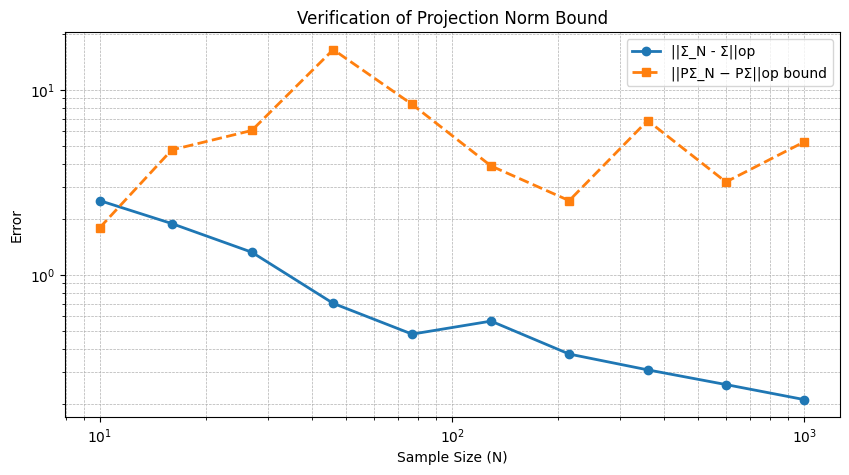

In [7]:
# Step 6: Plot results
plt.figure(figsize=(10, 5))
plt.loglog(N_values, errors, label='||Σ_N - Σ||op', marker='o', linestyle='-', linewidth=2)
plt.loglog(N_values, projection_bounds, label='||PΣ_N − PΣ||op bound', marker='s', linestyle='--', linewidth=2)
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.title('Verification of Projection Norm Bound')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()
